In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [5]:
import warnings
warnings.filterwarnings('ignore')

###### 2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [6]:
df = pd.read_csv('insurance_part2_data-2.csv')

In [7]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


###### Observations:
- 10 variables
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

#### Check for missing value in any column

In [10]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

###### Observation
No missing values

#### Descriptive Statistics Summary

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


###### Observations
- duration has negative valu, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly

In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Observation
Categorial code variable maximun unique count is 5

In [13]:
df.shape

(3000, 10)

#### Check for duplicate data

In [14]:
dups = df.duplicated()
print('Number of duplicated rows = %d' % (dups.sum()))
df[dups]

Number of duplicated rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


###### Removing Duplicates - Not removing them - no unique identifier, can be different customer.
Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so I am not dropping them off.

#### Univariate Analysis
Age variable

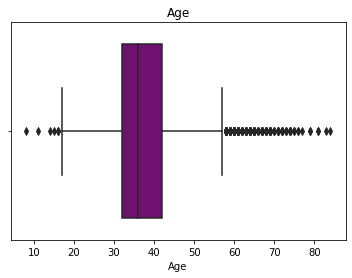

In [15]:
plt.title('Age')
sns.boxplot(df['Age'],orient='horizontal',color='purple')

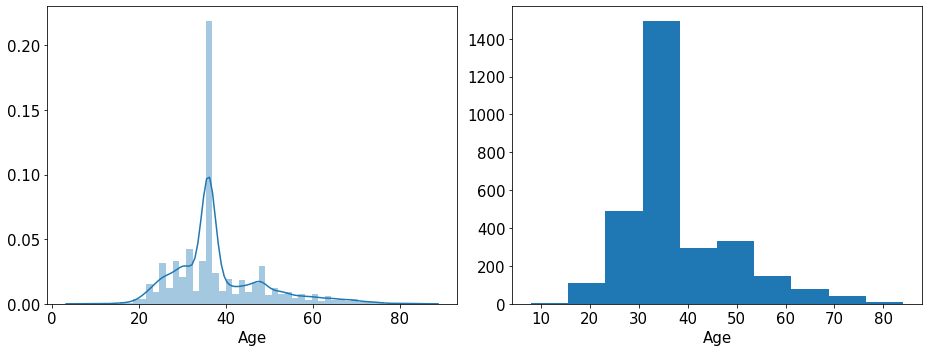

In [16]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Commision variable

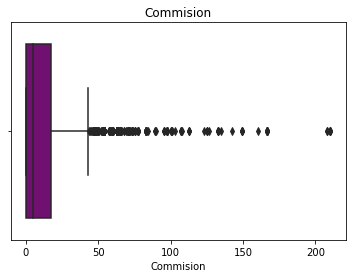

In [17]:
plt.title('Commision')
sns.boxplot(df['Commision'],orient='horizontal',color='purple')

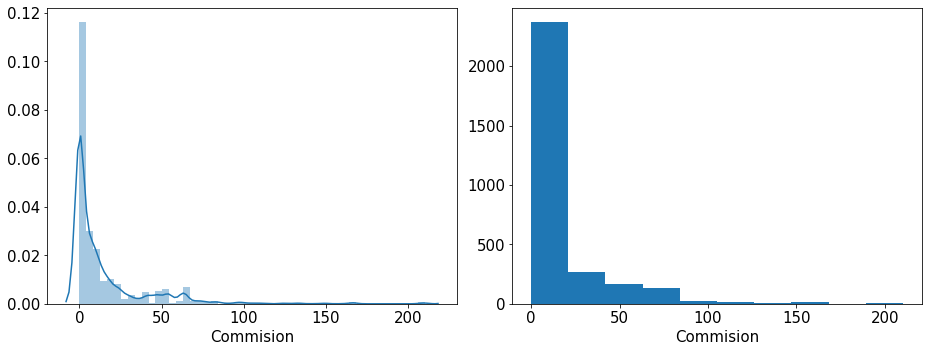

In [18]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Duration variable

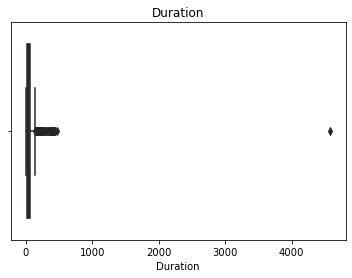

In [19]:
plt.title('Duration')
sns.boxplot(df['Duration'],orient='horizontal',color='purple')

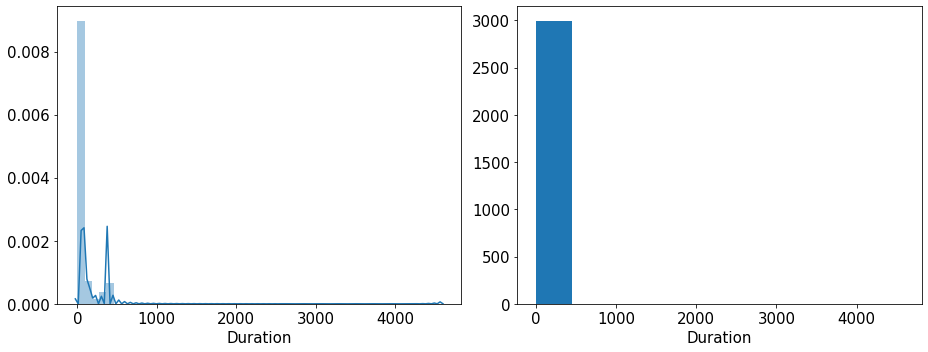

In [20]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Sales variable

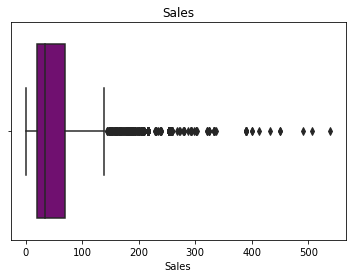

In [21]:
plt.title('Sales')
sns.boxplot(df['Sales'],orient='horizontal',color='purple')

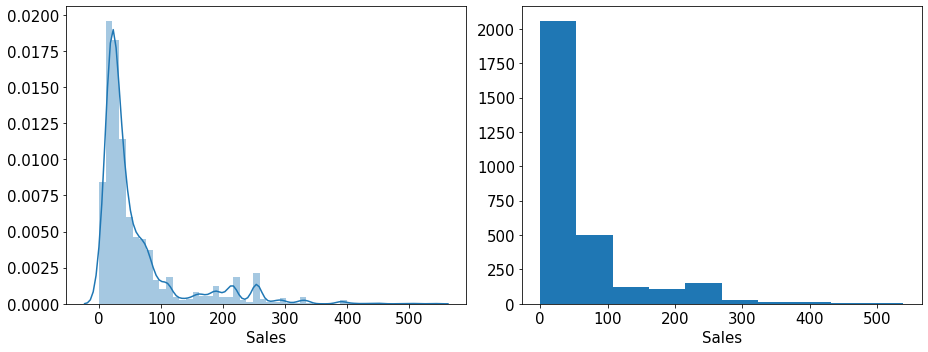

In [22]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Observations:
There are outliers in all the variables, but the sales and commision can be a geneui business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

I will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.

#### Categorical Variables


##### Agency_Code

In [23]:
# Count plot

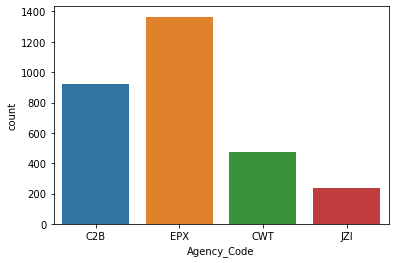

In [24]:
sns.countplot(data = df, x = 'Agency_Code')

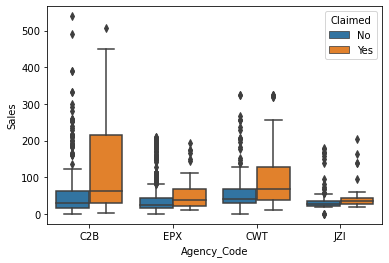

In [25]:
# Box plot

sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

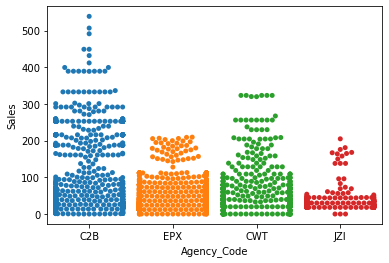

In [26]:
# Swarmpot

sns.swarmplot(data = df, x='Agency_Code',y='Sales')

##### Type

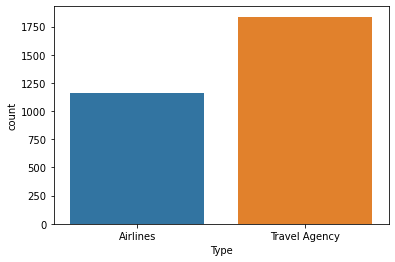

In [27]:
# Count plot

sns.countplot(data = df, x = 'Type')

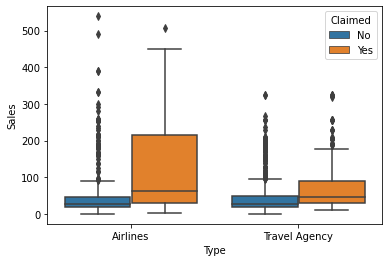

In [28]:
# Box plot

sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

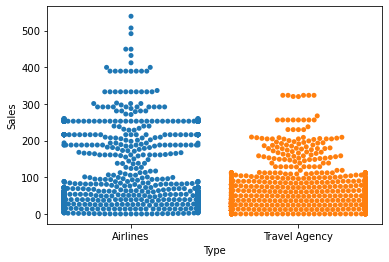

In [29]:
# swarm plot

sns.swarmplot(data = df, x='Type',y='Sales')

#### Channel

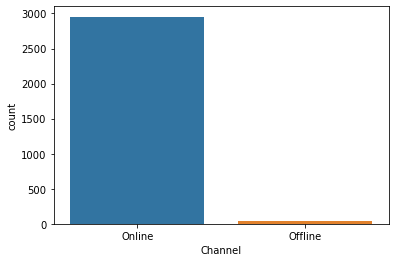

In [30]:
# count plot
sns.countplot(data = df, x = 'Channel')

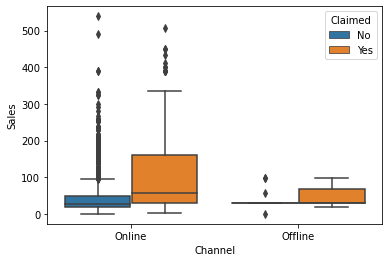

In [31]:
# Box plot

sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

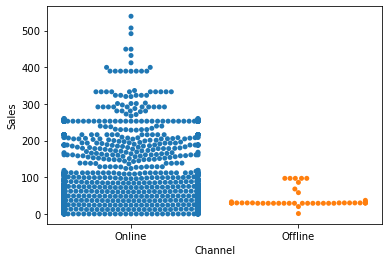

In [32]:
# swarm plot

sns.swarmplot(data = df, x='Channel',y='Sales')

#### Product Name

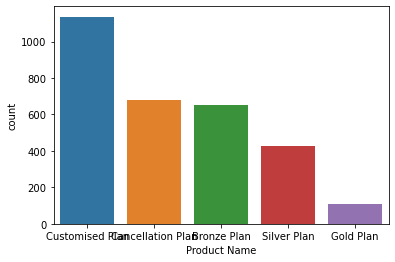

In [33]:
# Count plot

sns.countplot(data = df, x = 'Product Name')

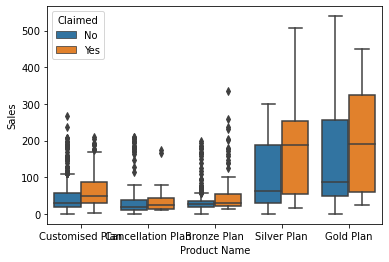

In [34]:
# Box plot

sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

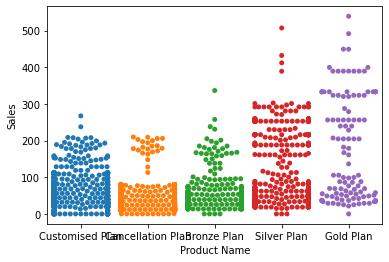

In [35]:
# Swarm plot

sns.swarmplot(data = df, x='Product Name',y='Sales')

#### Destination

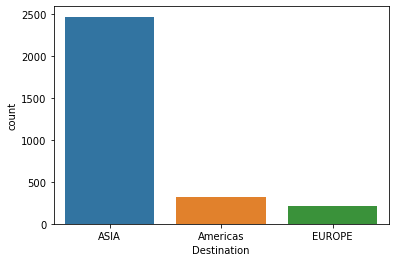

In [36]:
# Count plot

sns.countplot(data = df, x = 'Destination')

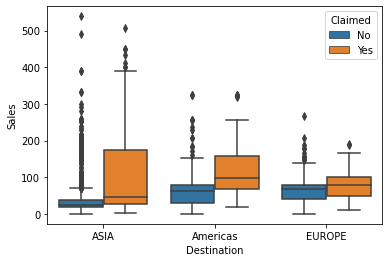

In [60]:
# Box plot

sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

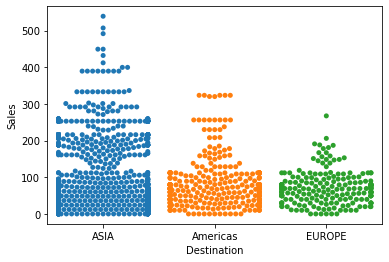

In [61]:
# Swarm plot

sns.swarmplot(data = df, x='Destination',y='Sales')

##### Checking pairwise distribution of the continuous variables

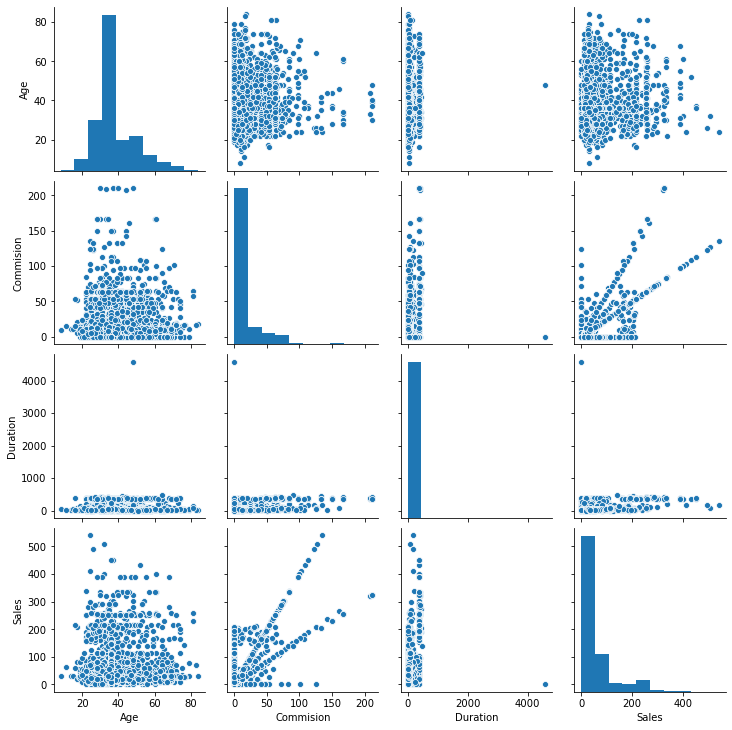

In [62]:
sns.pairplot(df)

##### Checking for Correlations

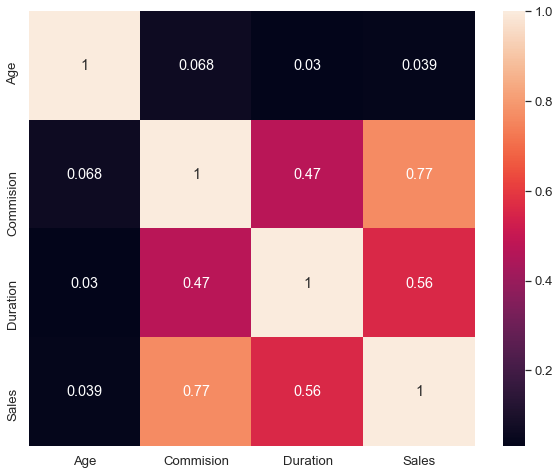

In [63]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)

#### Converting all objects to categorical codes

In [8]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


##### Proportion of 1s and 0s

In [39]:
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

###### 2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [10]:
X = df.drop("Claimed", axis = 1)

y = df.pop("Claimed")

##### Splitting data into training and test set

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

##### Building a Decision Tree Classifier

In [13]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [14]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [15]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [16]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=150,
                       random_state=1)

In [17]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [18]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 4.0, 'min_samples_leaf': 46, 'min_samples_split': 280}


DecisionTreeClassifier(max_depth=4.0, min_samples_leaf=46,
                       min_samples_split=280, random_state=1)

In [19]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [82]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5.0, 'min_samples_leaf': 42, 'min_samples_split': 200}


DecisionTreeClassifier(max_depth=5.0, min_samples_leaf=42,
                       min_samples_split=200, random_state=1)

##### Generating Tree

In [20]:
from sklearn import tree

In [21]:
train_char_label = ['No', 'Yes']

In [22]:
Tree_Insurance = open(r'C:\Users\swetha\Desktop\Tree\Tree_Insurance.dot', 'w+')

In [23]:
dot_data = tree.export_graphviz(best_grid_dtcl, out_file=Tree_Insurance, feature_names = list(X_train), class_names = list(train_char_label))

Tree_Insurance.close()

In [24]:
dot_data

###### http://webgraphviz.com/

In [25]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.621974
Sales         0.257721
Product Name  0.057386
Commision     0.023406
Duration      0.023111
Age           0.016403
Type          0.000000
Channel       0.000000
Destination   0.000000


#### Predicting on Training and Test dataset

In [26]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

##### Getting the Predicted Classes and Probs

In [27]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.887805,0.112195
1,0.432432,0.567568
2,0.432432,0.567568
3,0.208163,0.791837
4,0.937143,0.062857


#### Building a Random Forest Classifier

In [28]:
param_grid_rfcl = {
    'max_depth': [30,40],
    'max_features': [7,8],
    'min_samples_leaf': [50,100],
    'min_samples_split': [150,300], 
    'n_estimators': [101,301] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [29]:
grid_search_rfcl.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [30, 40], 'max_features': [7, 8],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [101, 301]})

In [30]:
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 30, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 150, 'n_estimators': 301}


RandomForestClassifier(max_depth=30, max_features=7, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=301, random_state=1)

#### Predicting the Training and Testing data

In [31]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [32]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.755286,0.244714
1,0.537622,0.462378
2,0.635122,0.364878
3,0.286223,0.713777
4,0.920926,0.079074


#### Variable Importance via RF

In [33]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.501401
Product Name  0.186148
Sales         0.181234
Commision     0.060033
Duration      0.032852
Age           0.027966
Type          0.008261
Destination   0.002105
Channel       0.000000


### Building a Neural Network Classifier

In [34]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [35]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,200], 
    'max_iter': [2500,5000], 
    'solver': ['sgd'],
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [36]:
grid_search_nncl.fit(X_trains, train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 200],
                         'max_iter': [2500, 5000], 'solver': ['sgd'],
                         'tol': [0.01]})

In [38]:
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1,
              solver='sgd', tol=0.01)

#### Predicting the Training and Testing data

In [39]:
ytrain_predict_nncl = best_grid_nncl.predict(X_trains)
ytest_predict_nncl = best_grid_nncl.predict(X_tests)

#### Getting the Predicted Classes and Probs

In [40]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_tests)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.833619,0.166381
1,0.610337,0.389663
2,0.600408,0.399592
3,0.443018,0.556982
4,0.805135,0.194865


###### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

#### CART - AUC and ROC for the training data

AUC: 0.825


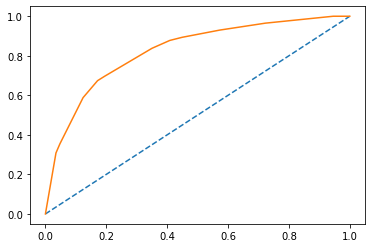

In [41]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

#### CART -AUC and ROC for the test data

AUC: 0.792


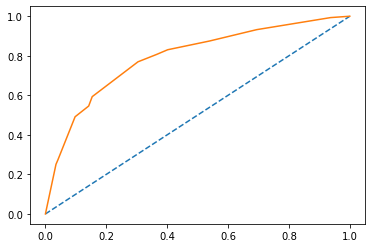

In [42]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

#### CART Confusion Matrix and Classification Report for the training data

In [45]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1289,  182],
       [ 259,  370]], dtype=int64)

In [44]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.79

In [46]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.59      0.63       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.79      2100



In [47]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.67
cart_train_recall  0.59
cart_train_f1  0.63


#### CART Confusion Matrix and Classification Report for the testing data

In [48]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[546,  59],
       [150, 145]], dtype=int64)

In [49]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7677777777777778

In [50]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.49      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.75       900



In [51]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.49
cart_test_f1  0.58


###### Cart Conclusion
Train Data:
- AUC: 83%
- Accuracy: 79%
- Precision: 67%
- f1-Score: 63%

Test Data:
- AUC: 79%
- Accuracy: 77%
- Precision: 71%
- f1-Score: 58%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### RF Model Performance Evaluation on Training data

In [52]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1309,  162],
       [ 278,  351]], dtype=int64)

In [53]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.7904761904761904

In [54]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1471
           1       0.68      0.56      0.61       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [55]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.56
rf_train_f1  0.61


Area under Curve is 0.8364490375127397


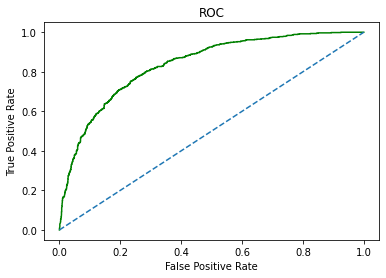

In [56]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

#### RF Model Performance Evaluation on Test data

In [57]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[553,  52],
       [160, 135]], dtype=int64)

In [58]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7644444444444445

In [59]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.56       295

    accuracy                           0.76       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [60]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.46
rf_test_f1  0.56


Area under Curve is 0.8161283092870151


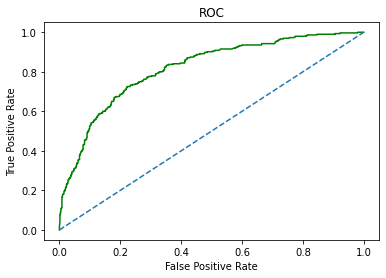

In [61]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

###### Random Forest Conclusion
Train Data:
- AUC: 84%
- Accuracy: 79%
- Precision: 68%
- f1-Score: 61%

Test Data:
- AUC: 82%
- Accuracy: 76%
- Precision: 72%
- f1-Score: 56

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### NN Model Performance Evaluation on Training data

In [62]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1378,   93],
       [ 395,  234]], dtype=int64)

In [63]:
nn_train_acc=best_grid_nncl.score(X_trains,train_labels) 
nn_train_acc

0.7676190476190476

In [64]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1471
           1       0.72      0.37      0.49       629

    accuracy                           0.77      2100
   macro avg       0.75      0.65      0.67      2100
weighted avg       0.76      0.77      0.74      2100



In [65]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.72
nn_train_recall  0.37
nn_train_f1  0.49


Area under Curve is 0.7837702740529948


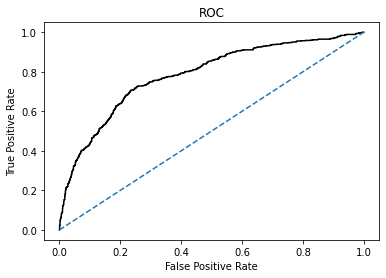

In [72]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_trains)[:,1])
print('Area under Curve is', nn_train_auc)

#### NN Model Performance Evaluation on Test data

In [67]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[575,  30],
       [203,  92]], dtype=int64)

In [71]:
nn_test_acc=best_grid_nncl.score(X_tests,test_labels)
nn_test_acc

0.7411111111111112

In [69]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       605
           1       0.75      0.31      0.44       295

    accuracy                           0.74       900
   macro avg       0.75      0.63      0.64       900
weighted avg       0.74      0.74      0.70       900



In [70]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.75
nn_test_recall  0.31
nn_test_f1  0.44


Area under Curve is 0.7449642807115843


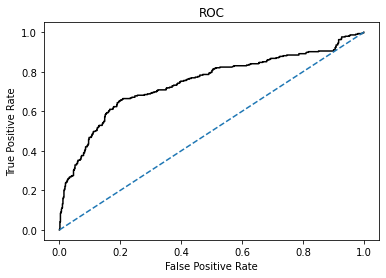

In [73]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_tests)[:,1])
print('Area under Curve is', nn_test_auc)

###### Neural Network Conclusion
Train Data:
- AUC: 78%
- Accuracy: 77%
- Precision: 72%
- f1-Score: 49%

Test Data:
- AUC: 74%
- Accuracy: 74%
- Precision: 75%
- f1-Score: 44%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

###### 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

In [74]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.79,0.76,0.77,0.74
AUC,0.83,0.79,0.84,0.82,0.78,0.74
Recall,0.59,0.49,0.56,0.46,0.37,0.31
Precision,0.67,0.71,0.68,0.72,0.72,0.75
F1 Score,0.63,0.58,0.61,0.56,0.49,0.44


#### ROC Curve for the 3 models on the Training data

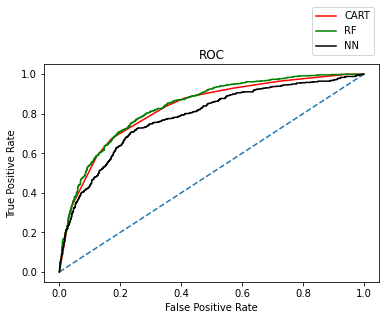

In [75]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC Curve for the 3 models on the Test data

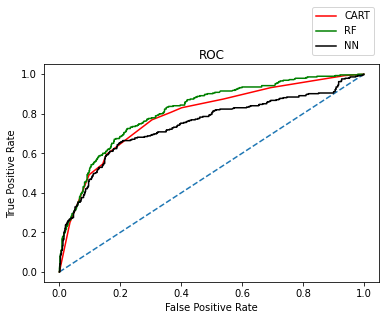

In [76]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

###### CONCLUSION :
I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.

###### 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.